In [1]:
import json
from pprint import pprint
from collections import defaultdict
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
import numpy as np

In [2]:
with open('trialdata.json') as fs:
     data = json.load(fs)

In [3]:
bonus = 0
score_list = {}
count_total_participants = 0

count_con0 = 0
count_con1 = 0

score_con0_list = []
score_con1_list = []

count_con0_skill1 = 0
count_con0_skill2 = 0

score_con0_skill1 = 0
score_con0_skill2 = 0

score_con0_skill1_list = []
score_con0_skill2_list = []

count_con0_only_skill1 = 0
count_con0_only_skill2 = 0

score_con0_only_skill1 = 0
score_con0_only_skill2 = 0

count_con1_skill1 = 0
count_con1_skill2 = 0

score_con1_skill1 = 0
score_con1_skill2 = 0

score_con1_skill1_list = []
score_con1_skill2_list = []

count_con1_only_skill1 = 0
count_con1_only_skill2 = 0

score_con1_only_skill1 = 0
score_con1_only_skill2 = 0

count_con0_both = 0
count_con1_both = 0

count_con0_1_to_2 = 0
count_con1_1_to_2 = 0

score_con0_both = 0
score_con1_both = 0

score_con0_both_list = []
score_con1_both_list = []

count_con0_skill2_mastery = 0
count_con1_skill2_mastery = 1

count_con0_skill2_until_mastery_list = []
count_con1_skill2_until_mastery_list = []

count_skill2_until_mastery_dict = defaultdict(list)


proportion_skill2_until_mastery_dict = defaultdict(list)

proportion_first_skill2 = defaultdict(list)

count_complete_exp = 0

d = defaultdict(list)


proportion_skill_2_dict = defaultdict(list)



In [4]:
for records in data:
    
    same_user = False
    saved_skill2_mastery = False
    skill2_mastery_step = None
    
    count_last_complete_exp = count_complete_exp
    
    score_steps = []
    tried_skills = []
    total_steps = []
    
#     print(len(data[0]['data'][0]))
    record_condition = records['condition'][0]
#     print(record_condition)
    d['condition'].append(record_condition)
    
    for record in records['data'][0]:
#         print(record)
        trial = record['trialdata']
#         print(trial)
        if trial['phase'] == 'TEST':               
#           count the number of mastering skill2
            if saved_skill2_mastery is False and trial['currentK2'] == 1: 
                saved_skill2_mastery = True
                
                skill2_mastery_step = trial['totalStep']
#                 print('skill 2 mastered at step', skill2_mastery_step)
                
                if record_condition == 0:
                    count_con0_skill2_mastery += 1
                if record_condition == 1:
                    count_con1_skill2_mastery += 1
                    
            score_steps.append(trial['score'])
            tried_skills.append(trial['skillTried'])
            total_steps.append(trial['totalStep'])

        if trial['phase'] == 'postquestionnaire' and same_user is False:
#             print('come into postquestionnaire')
            same_user = True
            count_complete_exp += 1
            
    if count_last_complete_exp == count_complete_exp:
        print("worker did not finish the exp")

    else:
        count_total_participants += 1

#       tried_skills = list(set(tried_skills))
        d['final_score'].append(score_steps[-1])
        d['tried_skills'].append(tried_skills)
        d['total_step'].append(total_steps[-1])

        assert len(tried_skills) == total_steps[-1]
        
        prop_skill_2 = float(tried_skills.count(2))/len(tried_skills)

#         print('final score', score_steps[-1])
#         print('tried skills', tried_skills)
#         print('total step', total_steps[-1])

        if record_condition == 0:
#             print('come into condition 0')
            count_con0 += 1
            score_con0_list.append(score_steps[-1])
            
            count_con0_skill2_until_mastery = tried_skills[:skill2_mastery_step].count(2)
#             count_con0_skill2_until_mastery_list.append(count_con0_skill2_until_mastery)
            count_skill2_until_mastery_dict['con0'].append(count_con0_skill2_until_mastery)
            
    
#             print('steps taken without successfully mastering skill 2', count_con0_skill2_until_mastery)
            proportion_skill2_until_mastery_dict['con0'].append(float(count_con0_skill2_until_mastery)/len(tried_skills))
            proportion_skill2_until_mastery_dict['con0_till_success'].append(float(count_con0_skill2_until_mastery)/len(tried_skills[:skill2_mastery_step]))
            


#             print('proportion skill 2 for con 0', prop_skill_2)

            proportion_skill_2_dict['con0'].append(prop_skill_2) 
#             print('tried skills', tried_skills)
#           count the number of tried both skills, only skill1, only skill2, including skill1, including skill2
            if 1 in tried_skills and 2 in tried_skills:
                count_con0_both += 1
                score_con0_both += score_steps[-1]
                score_con0_both_list.append(score_steps[-1])

            if 1 in tried_skills and 2 not in tried_skills:
                count_con0_only_skill1 += 1
                score_con0_only_skill1 += score_steps[-1]

            if 2 in tried_skills and 1 not in tried_skills:
                count_con0_only_skill2 += 1
                score_con0_only_skill2 += score_steps[-1]

            if 1 in tried_skills:
#                 print('come into tried skills')
                count_con0_skill1 += 1
                score_con0_skill1 += score_steps[-1]
                score_con0_skill1_list.append(score_steps[-1])

            if 2 in tried_skills:

                count_con0_skill2 += 1
                score_con0_skill2 += score_steps[-1]
                score_con0_skill2_list.append(score_steps[-1])
                
                timestep = next(i for i, v in enumerate(tried_skills) if v == 2) + 1
#                 print('the timestep skill 2 tried for the first time', timestep)
                
                proportion_first_skill2['con0'].append(float(timestep)/len(tried_skills))
                
                if timestep != 1:
#                     print('tried first skill2 not early than the second step', timestep)
                    count_con0_1_to_2 += 1
#                     print(tried_skills)
                    proportion_first_skill2['con0_timestep>1'].append(float(timestep)/len(tried_skills))
            
#                 print('proportion skill 2 for con 0 when tried skill 2 at least once', prop_skill_2)
                proportion_skill_2_dict['con0_skill2>=1'].append(prop_skill_2)
                proportion_skill2_until_mastery_dict['con0_skill2>=1'].append(float(count_con0_skill2_until_mastery)/len(tried_skills))
                count_skill2_until_mastery_dict['con0_skill2>=1'].append(count_con0_skill2_until_mastery)
                

        if record_condition == 1:

            count_con1 += 1
            score_con1_list.append(score_steps[-1])
            
            count_con1_skill2_until_mastery = tried_skills[:skill2_mastery_step].count(2)
#             count_con1_skill2_until_mastery_list.append(count_con1_skill2_until_mastery)
            count_skill2_until_mastery_dict['con1'].append(count_con1_skill2_until_mastery)
            
#             print('steps taken without successfully mastering skill 2', count_con1_skill2_until_mastery)
            proportion_skill2_until_mastery_dict['con1'].append(float(count_con1_skill2_until_mastery)/len(tried_skills))
            proportion_skill2_until_mastery_dict['con1_till_success'].append(float(count_con1_skill2_until_mastery)/len(tried_skills[:skill2_mastery_step]))

#             print('proportion skill 2 for con 1', prop_skill_2)

            proportion_skill_2_dict['con1'].append(prop_skill_2)


            if 1 in tried_skills and 2 in tried_skills:
                count_con1_both += 1
                score_con1_both += score_steps[-1]
                score_con1_both_list.append(score_steps[-1])

            if 1 in tried_skills and 2 not in tried_skills:
                count_con1_only_skill1 += 1
                score_con1_only_skill1 += score_steps[-1]

            if 2 in tried_skills and 1 not in tried_skills:
                count_con1_only_skill2 += 1
                score_con1_only_skill2 += score_steps[-1]

            if 1 in tried_skills:
                count_con1_skill1 += 1
                score_con1_skill1 += score_steps[-1]
                score_con1_skill1_list.append(score_steps[-1])


            if 2 in tried_skills:
                count_con1_skill2 += 1
                score_con1_skill2 += score_steps[-1]
                score_con1_skill2_list.append(score_steps[-1])
                
                timestep = next(i for i, v in enumerate(tried_skills) if v == 2) + 1
#                 print('the timestep skill 2 tried for the first time', timestep)
                proportion_first_skill2['con1'].append(float(timestep)/len(tried_skills))
    
                if timestep != 1:
#                     print('tried first skill2 not early than the second step', timestep)
                    count_con1_1_to_2 += 1
#                     print(tried_skills)

                    proportion_first_skill2['con1_timestep>1'].append(float(timestep)/len(tried_skills))
                
#                 print('proportion skill 2 for con 1 when tried skill 2 at least once', prop_skill_2)
                proportion_skill_2_dict['con1_skill2>=1'].append(prop_skill_2)
                proportion_skill2_until_mastery_dict['con1_skill2>=1'].append(float(count_con1_skill2_until_mastery)/len(tried_skills))
                count_skill2_until_mastery_dict['con1_skill2>=1'].append(count_con1_skill2_until_mastery)
                
#     print('')
#     print('')

assert len(proportion_skill2_until_mastery_dict['con1']) == count_con1
assert len(proportion_skill2_until_mastery_dict['con0']) == count_con0
assert len(proportion_skill2_until_mastery_dict['con0_skill2>=1']) == count_con0_skill2
assert len(proportion_skill2_until_mastery_dict['con1_skill2>=1']) == count_con1_skill2
assert len(d['condition']) == len(d['final_score']) == len(d['tried_skills']) == len(d['total_step'])

prop_skill_2_average_con0 = np.mean(proportion_skill_2_dict['con0'])
prop_skill_2_average_con1 = np.mean(proportion_skill_2_dict['con1'])
prop_skill_2_average_con0_least_once = np.mean(proportion_skill_2_dict['con0_skill2>=1'])
prop_skill_2_average_con1_least_once = np.mean(proportion_skill_2_dict['con1_skill2>=1'])

prop_skill2_until_master_averay_con0 = np.mean(proportion_skill2_until_mastery_dict['con0'])
prop_skill2_until_master_averay_con1 = np.mean(proportion_skill2_until_mastery_dict['con1'])
prop_skill2_until_master_averay_con0_least_once = np.mean(proportion_skill2_until_mastery_dict['con0_skill2>=1'])
prop_skill2_until_master_averay_con1_least_once = np.mean(proportion_skill2_until_mastery_dict['con1_skill2>=1'])
prop_skill2_until_master_averay_con0_till_masterstep = np.mean(proportion_skill2_until_mastery_dict['con0_till_success'])
prop_skill2_until_master_averay_con1_till_masterstep = np.mean(proportion_skill2_until_mastery_dict['con1_till_success'])



prop_first_skill2_average_con0 = np.mean(proportion_first_skill2['con0'])
prop_first_skill2_average_con1 = np.mean(proportion_first_skill2['con1'])
prop_first_skill2_after_skill1_average_con0 = np.mean(proportion_first_skill2['con0_timestep>1'])
prop_first_skill2_after_skill1_average_con1 = np.mean(proportion_first_skill2['con1_timestep>1'])

score_con0_average = np.mean(score_con0_list)
score_con1_average = np.mean(score_con1_list)

additional_attemps_skill2_con0 = [x - 1 for x in count_skill2_until_mastery_dict['con0_skill2>=1']]
additional_attemps_skill2_con1 = [x - 1 for x in count_skill2_until_mastery_dict['con1_skill2>=1']]


# print('valid total participants', count_total_participants)
# print('valid total con 0', count_con0,
#       'trying skill 1', count_con0_skill1, 'average score', float(score_con0_skill1)/count_con0_skill1,
#       'only skill 1', count_con0_only_skill1, 'average score', float(score_con0_only_skill1)/count_con0_only_skill1,
#       'trying skill 2', count_con0_skill2, 'average score', float(score_con0_skill2)/count_con0_skill2,
#       'only skill 2', count_con0_only_skill2, 'average score', float(score_con0_only_skill2)/count_con0_only_skill2,
#       'trying both', count_con0_both, 'average score', float(score_con0_both)/count_con0_both, 
#       'master skill 2 among all in con 0', count_con0_skill2_mastery, 'prop', float(count_con0_skill2_mastery)/count_con0,
#       'prop of mastering skill 2 among all tried skill 2 in con 0', float(count_con0_skill2_mastery)/count_con0_skill2,

#      )

# print("valid total con 1", count_con1, 

#       'trying skill 1', count_con1_skill1,
#       'average score', float(score_con1_skill1)/count_con1_skill1,
      
#       'only skill 1', count_con1_only_skill1,
#       'average score', float(score_con1_only_skill1)/count_con1_only_skill1,
#       "\n"
#       'trying skill 2', count_con1_skill2, 
#       'average score', float(score_con1_skill2)/count_con1_skill2,

#       'only skill 2', count_con1_only_skill2,
#       'average score', float(score_con1_only_skill2)/count_con1_only_skill2,

#       'trying both', count_con1_both,
#       'average score', float(score_con1_both)/count_con1_both,

#       'master skill 2 among all in con 1', count_con1_skill2_mastery, 
#       'prop', float(count_con1_skill2_mastery)/count_con1,
#       'prop of mastering skill 2 among all tried skill 2 in con 1', float(count_con1_skill2_mastery)/count_con1_skill2,
#      )

# print('proportion skill 2 average for con 0', prop_skill_2_average_con0, 'and for con1', prop_skill_2_average_con1)
# print('proportion skill 2 average for con 0 at least once', prop_skill_2_average_con0_least_once, 'and for con1', prop_skill_2_average_con1_least_once)

# print('proportion first tried skill 2 for con 0 average', 
#        prop_first_skill2_average_con0, 
#       'and for con 1 average', 
#        prop_first_skill2_average_con1)

# print('proportion first tried skill 2 after trying skill 1 for con 0 average', 
#        prop_first_skill2_after_skill1_average_con0, 
#       'and for con 1 average', 
#        prop_first_skill2_after_skill1_average_con1)

# print('prop trying skill 2 without success for con 0 average', 
#        prop_skill2_until_master_averay_con0,
#       'prop trying skill 2 without success for con 1 average', 
#        prop_skill2_until_master_averay_con1)

# print('prop trying skill 2 without success among all tried skill2 in con 0 average', 
#        prop_skill2_until_master_averay_con0_least_once,
#       'prop trying skill 2 without success among all tried skill2 in con 0 average', 
#        prop_skill2_until_master_averay_con1_least_once )

# print('score con 0 average', score_con0_average)
# print('score con 1 average', score_con1_average)

# print('turn trying skill 1 to skill 2 in con 0', count_con0_1_to_2)
# print('turn trying skill 1 to skill 2 in con 1', count_con1_1_to_2)

# print(count_skill2_until_mastery_dict['con0'])
# print(count_skill2_until_mastery_dict['con1'])

# print(count_skill2_until_mastery_dict['con0_skill2>=1'])
# print(count_skill2_until_mastery_dict['con1_skill2>=1'])


# print(prop_skill2_until_master_averay_con0_till_masterstep)
# print(prop_skill2_until_master_averay_con1_till_masterstep)


# print('completed exp', count_complete_exp)

    

### Test Results

In [5]:
np.mean(count_skill2_until_mastery_dict['con0'])

2.7876106194690267

In [6]:
np.mean(count_skill2_until_mastery_dict['con1'])

3.9464285714285716

In [7]:
np.mean(count_skill2_until_mastery_dict['con0_skill2>=1'])

5.121951219512195

In [8]:
np.mean(count_skill2_until_mastery_dict['con1_skill2>=1'])

6.314285714285714

In [9]:
np.median(count_skill2_until_mastery_dict['con0_skill2>=1'])

3.0

In [10]:
np.median(count_skill2_until_mastery_dict['con1_skill2>=1'])

5.0

In [11]:
np.mean(additional_attemps_skill2_con0)

4.121951219512195

In [12]:
np.mean(additional_attemps_skill2_con1)

5.314285714285714

In [13]:
np.median(additional_attemps_skill2_con0)

2.0

In [14]:
np.median(additional_attemps_skill2_con1)

4.0

In [15]:
# compare the total score in either condition

t3, p3 = stats.ttest_ind(score_con0_list, score_con1_list)
p3 = p3/2
print('t value is', t3, 'p value is', p3)

t value is -1.7389034785829633 p value is 0.041369336172863924


In [16]:
# compare the count trying skill 2 until mastery 
# among all the participants in either condition
t9, p9 = stats.ttest_ind(count_skill2_until_mastery_dict['con0'], 
                         count_skill2_until_mastery_dict['con1'])
p9 = p9/2
print('t value is ', t9, 'p value is', p9)

t value is  -2.5247708193617058 p value is 0.005960801704021068


In [17]:
# compare the count of additional attemps trying to learn skill2
# among the participants who has tried skill 2 at least once
t11, p11 = stats.ttest_ind(additional_attemps_skill2_con0,
                          additional_attemps_skill2_con1)
p11 = p11/2
print('t value is', t11, 'p value is', p11)

t value is -1.8559214251517315 p value is 0.03229592586521633


In [18]:
# rows: mastered skill 2, not mastered skill2 among all in either condition; columns: condition 0, condition 1

obs5 = np.array([[count_con0_skill2_mastery, count_con1_skill2_mastery], 
                 [(count_con0 - count_con0_skill2_mastery), 
                  (count_con1 - count_con1_skill2_mastery)]])
chi2_contingency(obs5)

(3.7650969029853965,
 0.052332825708827795,
 1,
 array([[ 44.69777778,  44.30222222],
        [181.30222222, 179.69777778]]))

In [19]:
# wilcoxon rank sum test for comparing the count of the steps of trying skill 2 until mastery 
# among the participants who has tried skill 2 at least once
w, p = stats.ranksums(np.asarray(count_skill2_until_mastery_dict['con0_skill2>=1']), 
               np.asarray(count_skill2_until_mastery_dict['con1_skill2>=1']))
p = p/2
print('value', w, 'p', p)

value -2.489034127522926 p 0.006404533474661747


In [20]:
# wilcoxon rank sum test for comparing the count of additional attemps of trying skill 2 until mastery 
# among the participants who has tried skill 2 at least once

w, p = stats.ranksums(np.asarray(additional_attemps_skill2_con0),
                     np.asarray(additional_attemps_skill2_con1))
p = p/2
print('value', w, 'p', p)

value -2.489034127522926 p 0.006404533474661747


In [21]:
# wilcoxon rank sum test for comparing the count of the steps of trying skill 2 until mastery 
# among all the participants in either condition
w, p = stats.ranksums(np.asarray(count_skill2_until_mastery_dict['con0']), 
               np.asarray(count_skill2_until_mastery_dict['con1']))
p = p/2
print('value', w, 'p', p)

value -2.592517122873144 p 0.00476382191889416


### plot brain points effect on practice, mastery and performance

In [22]:
mean_con0_practice = np.mean(count_skill2_until_mastery_dict['con0_skill2>=1'])
median_con0_practice = np.median(count_skill2_until_mastery_dict['con0_skill2>=1'])-1

stem_con0_practice = stats.sem(count_skill2_until_mastery_dict['con0_skill2>=1'], axis=None, ddof=0)
std_con0_practice = np.std(count_skill2_until_mastery_dict['con0_skill2>=1'])
n0_practice = len(count_skill2_until_mastery_dict['con0_skill2>=1'])
yerr0_practice = std_con0_practice/np.sqrt(n0_practice)
assert yerr0_practice == stem_con0_practice

mean_con1_practice = np.mean(count_skill2_until_mastery_dict['con1_skill2>=1'])
stem_con1_practice = stats.sem(count_skill2_until_mastery_dict['con1_skill2>=1'], axis=None, ddof=0)

median_con1_practice = np.median(count_skill2_until_mastery_dict['con1_skill2>=1'])-1

std_con1_practice = np.std(count_skill2_until_mastery_dict['con1_skill2>=1'])
n1_practice = len(count_skill2_until_mastery_dict['con1_skill2>=1'])
yerr1_practice = std_con1_practice/np.sqrt(n1_practice)

assert yerr1_practice == stem_con1_practice

In [23]:
prop_con0_learning = float(count_con0_skill2_mastery)/count_con0
prop_con1_learning = float(count_con1_skill2_mastery)/count_con1
yerr0_learning = np.sqrt(prop_con0_learning*(1-prop_con0_learning)/count_con0)
yerr1_learning = np.sqrt(prop_con1_learning*(1-prop_con1_learning)/count_con1)

In [24]:
mean_score0 = np.mean(score_con0_list)
mean_score1 = np.mean(score_con1_list)
n0_score = len(score_con0_list)
n1_score = len(score_con1_list)
yerr0_score = np.std(score_con0_list)/np.sqrt(n0_score)
yerr1_score = np.std(score_con1_list)/np.sqrt(n1_score)

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


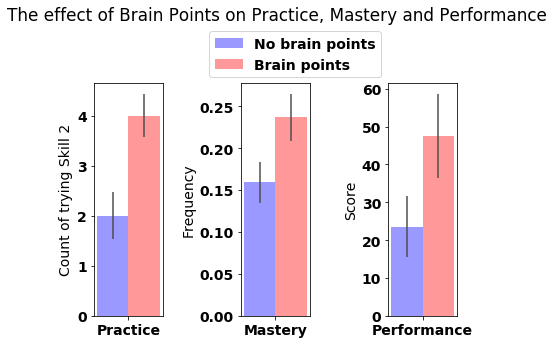

In [35]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)



fig, ax = plt.subplots(1, 3)



index = np.arange(1)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}


rects1 = ax[0].bar(index, median_con0_practice, bar_width,
                alpha=opacity, color='b',
                yerr=yerr0_practice, error_kw=error_config,
                label='No brain points')

rects2 = ax[0].bar(index + bar_width, median_con1_practice, bar_width,
                alpha=opacity, color='r',
                yerr=yerr1_practice, error_kw=error_config,
                label='Brain points')

# ax[0].set_xlabel('Categories')
ax[0].set_ylabel('Count of trying Skill 2')

ax[0].set_xticks(index + bar_width / 2)
ax[0].set_xticklabels(('Practice', ))

rects1 = ax[1].bar(index, prop_con0_learning, bar_width,
                  alpha=opacity, color='b',
                  yerr=yerr0_learning, error_kw=error_config,
                  label='No brain points')

rects2 = ax[1].bar(index+bar_width, prop_con1_learning, bar_width,
                  alpha=opacity, color='r',
                  yerr=yerr1_learning, error_kw=error_config,
                  label='Brain points')

ax[1].set_ylabel('Frequency')
ax[1].set_xticks(index+bar_width/2)
ax[1].set_xticklabels(('Mastery',))


rects1 = ax[2].bar(index, mean_score0, bar_width,
                alpha=opacity, color='b',
                yerr=yerr0_score , error_kw=error_config,
                label='No brain points')

rects2 = ax[2].bar(index + bar_width, mean_score1, bar_width,
                alpha=opacity, color='r',
                yerr= yerr1_score, error_kw=error_config,
                label='Brain points')

# ax[1].set_xlabel('Performance')
ax[2].set_ylabel('Score')

ax[2].set_xticks(index + bar_width / 2)
ax[2].set_xticklabels(('Performance',))


plt.suptitle('The effect of Brain Points on Practice, Mastery and Performance',x=0.54, y=1.2, horizontalalignment='center')
fig.tight_layout()
plt.legend(bbox_to_anchor=(0, 1.25))
# fig.savefig('effect_brain.pdf', bbox_inches = 'tight')



plt.show()
